---------------
## Visualization - Day6 HW

## Homework 6

Import the medical costs dataset:

https://www.kaggle.com/datasets/mirichoi0218/insurance

at this point you should be able to write code using what is provided on kagglehub and pandas to read in the data as a DataFrame. Remember one helpful command

    os.listdir(path)

to list the names of the files that you downloaded.

You job is to:

1.  Do basic EDA - value counts, nan counts, and statistics
2.  Try out a pairplot - comment on any trends, outliers, or interesting distributions.
3. Make a few plots of your own exploring the data. For example:

- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.

For part 3, your goal is to make multiple plots. You don't have to answer every question, but really try to practice all of the ideas from lecture. You must use each of the following at least once:

1. Plotly
2. Matlplotlib
3. Seaborn

(extra) Pandas

(extra) Bokeh
    
------------------------------------

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [3]:
# Some basic package imports
import os
import numpy as np
import pandas as pd
# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [5]:
os.listdir(path)

['insurance.csv']

In [9]:
file = '/Users/sethchairez/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv'
df = pd.read_csv(file)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1.  Do basic EDA - value counts, nan counts, and statistics

In [11]:
df['age'].value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [13]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 2  Try out a pairplot - comment on any trends, outliers, or interesting distributions.


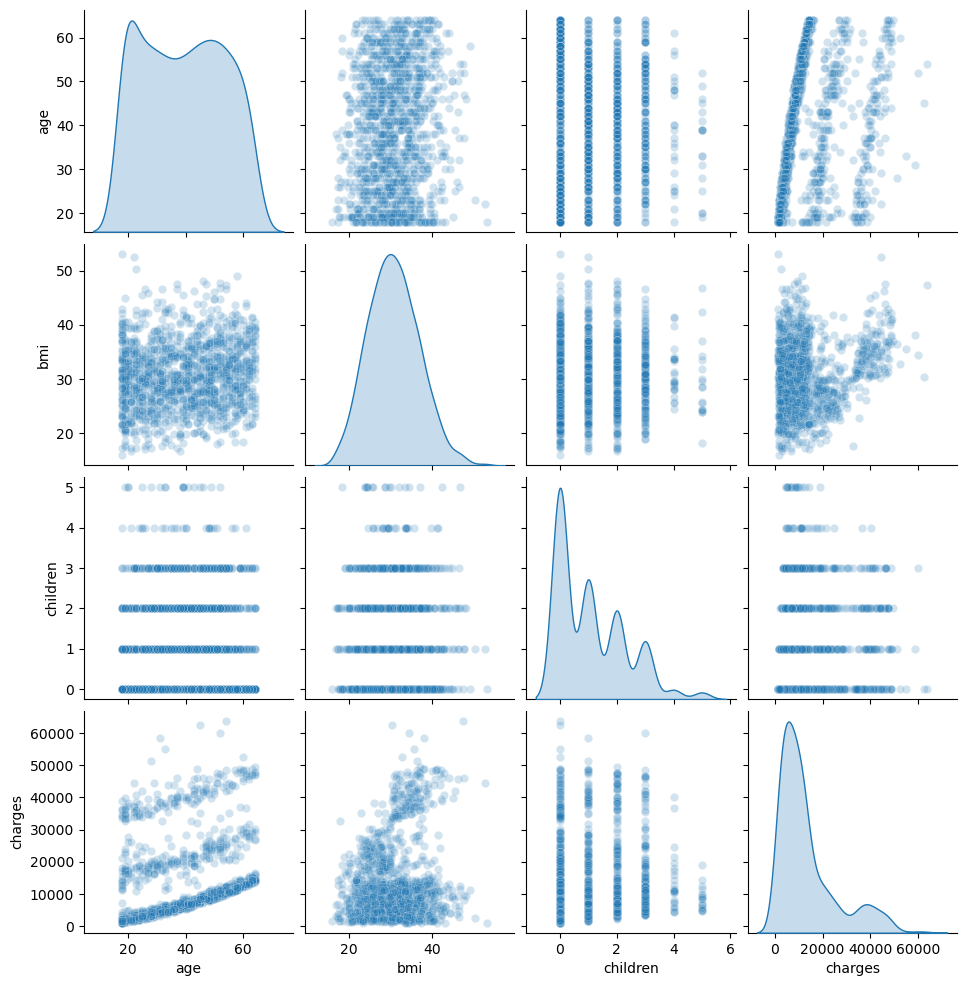

In [19]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})
plt.show()

- The BMI is almost a perfect curve, that is only peaking around the an age of 30. Due to BMI averaging around 19-24, this could suggest that individuals with this higher BMI are more obese. This can be seen as an outlier because there are no other points on this graph that peak.
  
- The graphs show that more people are skewed towards having fewer children. Most individuals have 0,1,or 2 children on the graph.
- There is a pretty strong correlation with charges and the number of children. Surprisingly the people that have less children are charged between 0-25,000 in charges. Individuals with 1 or 2 children are generally charged within the range of $21,000.
- An outlier that I noticed was one individaul that was around 19 and has a BMI of around 45. It also appears that this same individual that is charged near 60,000 dollars. 

# 3. Make a few plots of your own exploring the data. For example:
- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.


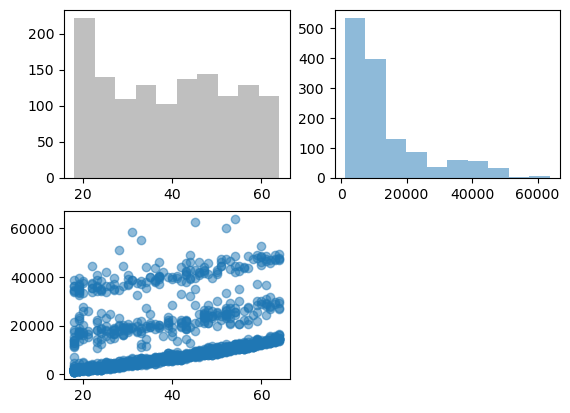

In [21]:
x = df['age']
y = df['charges']

fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3) 


ax1.hist(x,color = 'grey',bins = 10, alpha = .5)
ax2.hist(y,bins = 10, alpha = .5)
ax3.scatter(x,y,alpha = .5) 


# I wanted to try out the linear regression

Text(0.5, 1.0, 'Changes in age versus charges')

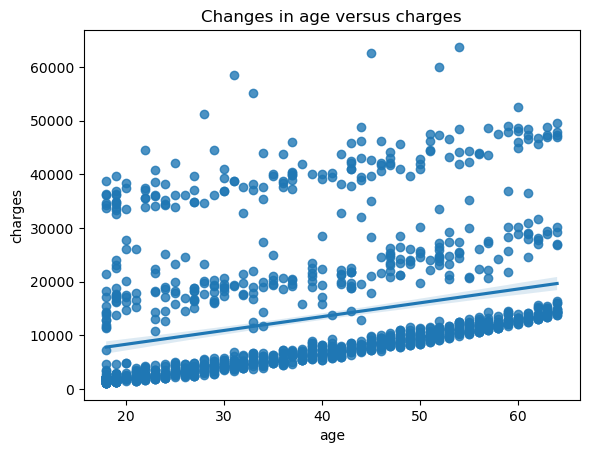

In [23]:
ax = sns.regplot(x = 'age', y = 'charges', data = df)
ax.set_title('Changes in age versus charges')




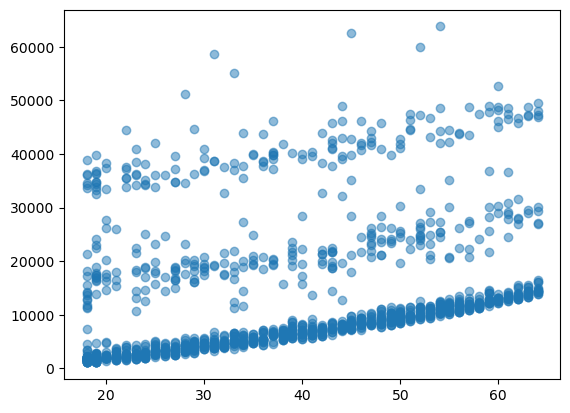

In [25]:
x = df['age']
y = df['charges']
plt.scatter(x,y,alpha = .5)


The graphs above show us a number of different things. The two bar graphs are shown in order to show us age seperate from the charges. With these graphs, we can see that a lot of the data overlaps with each other. Below both of these is a scatter plot that summarizes both of these bar graphs up. The darkers areas of the scatter graph tell us that there is a positive linear regression. Our ages range from 18-64 and stay consistent however, there are three main regions on the graph where the points are correlated.

#### The lowest line of the graph.
The lowest and darkest line on the graph is where individuals pay the lowest for medical coverage. This could mean that they are young or are healither than those in the other two regions. Individuals within this region pay anwhere from 0 to a little over 10,000 for medical costs. These could be people that go in for their yearly checkups with doctors.

#### The second region of the graph are people that pay in the medium range for medical coverage. 
Individuals that are between the ages of 18-44 pay nearly 15,000 for medical costs. Those that are 45-55 pay close to $25,000 for their medical costs. This region can represent people with presistent conditions and require medical attention more often than not. 

#### The third region are the people who need medical coverage.
We can only see a small number of individuals, specifcally within the range of 18-35 that are in need of medical costs. They pay anywhere from $35,000 to 41,000 for medical costs. These could be active smokers/vapers because these individuals are younger than most or diagnosed diseases. 


# Visualization of who is charged more on average: men, women, smokers, non-smokers? 


Text(0, 0.5, 'Charges')

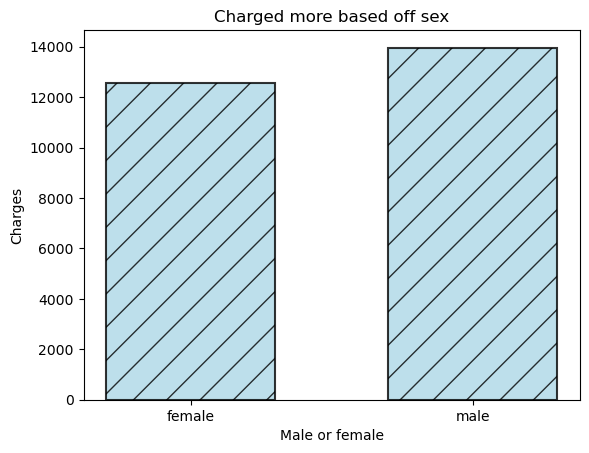

In [201]:
charges_for_each = df.groupby('sex')['charges'].mean()
plt.bar(charges_for_each.index,
        charges_for_each.values,
        color="lightblue",          # change bar color
        edgecolor="black",        # add edge color
        linewidth=1.5,            # thickness of edges
        hatch="/",                # pattern fill
        alpha=0.8,                # transparency (0=transparent, 1=opaque)
        width=0.6,                # width of bars
        align="center"
       )
plt.title('Charged more based off sex')
plt.xlabel('Male or female')
plt.ylabel('Charges')

Text(0, 0.5, 'charges')

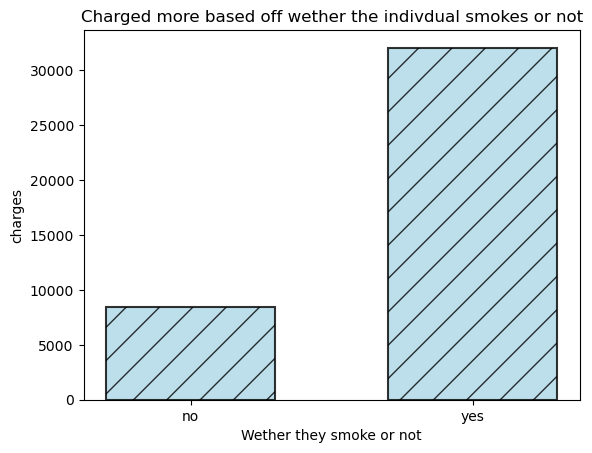

In [197]:
charges_for_each = df.groupby('smoker')['charges'].mean()
plt.bar(charges_for_each.index,
        charges_for_each.values,
        color="lightblue",          # change bar color
        edgecolor="black",        # add edge color
        linewidth=1.5,            # thickness of edges
        hatch="/",                # pattern fill
        alpha=0.8,                # transparency (0=transparent, 1=opaque)
        width=0.6,                # width of bars
        align="center"
       )
plt.title('Charged more based off wether the indivdual smokes or not')
plt.xlabel('Wether they smoke or not')
plt.ylabel('charges')

Text(0, 0.5, 'Charges')

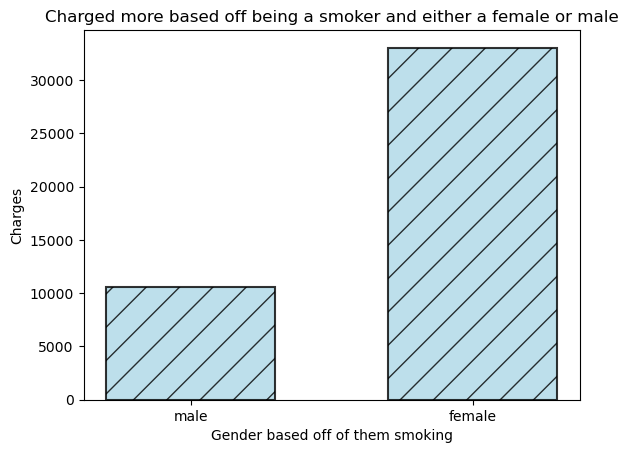

In [190]:
categories = ['male','female']
sex_male_and_smoke = (df['sex'] == 'male')&(df['smoker'] == 'yes')
#sex_female_and_smoke = (df['sex'] == 'female')&(df['smoker'] == 'yes')
charges_for_each = df.groupby(sex_male_and_smoke)['charges'].mean()
plt.bar(charges_for_each.index,
        charges_for_each.values,
        color="lightblue",          # change bar color
        edgecolor="black",        # add edge color
        linewidth=1.5,            # thickness of edges
        hatch="/",                # pattern fill
        alpha=0.8,                # transparency (0=transparent, 1=opaque)
        width=0.6,                # width of bars
        align="center")

plt.xticks(charges_for_each.index,categories)
plt.title('Charged more based off being a smoker and either a female or male')
plt.xlabel('Gender based off of them smoking')
plt.ylabel('Charges')

In this data, we can see that based off of gender, men are charged more than women. After this, I wanted to see if smokers were charged more than non smokers. From the results on the graph I conducted that smokers are charged more than individuals that not smoke. The third graph displays which geneder is charged more based on their smoking status. The graph displays that female smokers are charged more than average than men. This is surprising as it is proven that men smoke more than women on average. 

# Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.


In [ ]:
df['age'].sort_values().unique()

In [144]:
df['firstAge'] = df.loc[(df['age'] >= 18) & (df['age'] <=25),'charges']
first_group = df['firstAge'].max()
first_group

44501.3982

In [142]:
df['secondAge'] = df.loc[(df['age'] >= 26) & (df['age'] <=35),'charges']
second_group = df['secondAge'].max()
second_group

58571.07448

In [168]:
df['thirdAge'] = df.loc[(df['age'] >= 36) & (df['age'] <= 49),'charges']
third_group = df['thirdAge'].max()
third_group

62592.87309

In [170]:
df['fourthAge'] =  df.loc[(df['age'] >= 50) & (df['age'] <= 64),'charges']
fourth_group = df['fourthAge'].max()
fourth_group

63770.42801

In [150]:
first_group =44501.3982
second_group = 58571.07448
third_group = 62592.87309
fourth_group = 63770.42801

x = ['Young Adults','Adult World','Middle age adults','Elders']
y = [first_group,second_group,third_group,fourth_group]

Text(0, 0.5, 'Charges')

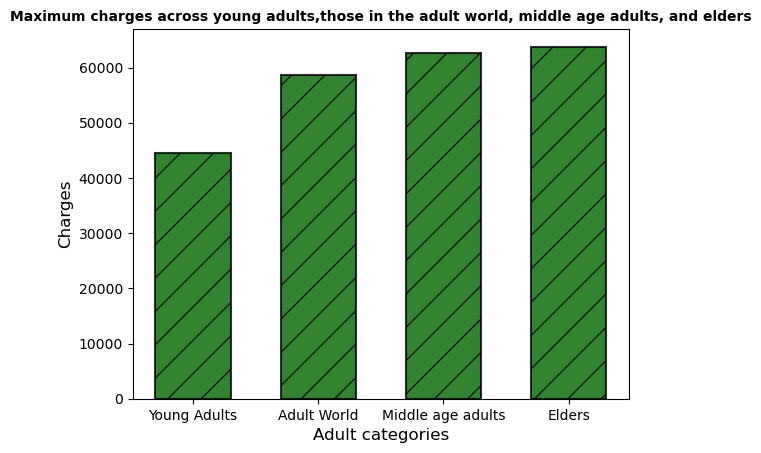

In [152]:
plt.bar(
    x,
    y,
    color="Darkgreen",          # change bar color
    edgecolor="black",        # add edge color
    linewidth=1.5,            # thickness of edges
    hatch="/",                # pattern fill
    alpha=0.8,                # transparency (0=transparent, 1=opaque)
    width=0.6,                # width of bars
    align="center"            # alignment: 'center' (default) or 'edge'
)
plt.title('Maximum charges across young adults,those in the adult world, middle age adults, and elders',fontsize=10, fontweight="bold")
plt.xlabel("Adult categories", fontsize=12)
plt.ylabel("Charges", fontsize=12)

This graph is showing the user the maximum number of charges between various adult categories. Based on the graph, we can see that the lowest maximum number of charges is in the young adults (18-25) category. This makes sense as these individuals generally tend to be healthier then those that are a little bit older. The next category are those that are entering the adult world in the range of(26-35). These charges are 20,000 dollars under middle age adults and elders which could suggest that they are starting to go in for constant checkups based off of underlying conditions of potential medical problems. Middle age adults(36-49) and Elders(50-64) are the highest, as middle aged adults are $1000 under Elders. These two are ranked highest as they are both easily prone to experiencing medical conditions and require constant health service. Based off of this graph, we can takeaway that medical charges increase steadily with age. Due to older individuals experencing health problems more easily health insurance may raise their prices if they aware of this risk. 